In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,recall_score ,classification_report

In [266]:
df=pd.read_csv(r'crs.data.csv',header=None,na_values='?')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [267]:
df.columns=['A'+str(i) for i in df.columns]
df

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A0      678 non-null    object 
 1   A1      678 non-null    float64
 2   A2      690 non-null    float64
 3   A3      684 non-null    object 
 4   A4      684 non-null    object 
 5   A5      681 non-null    object 
 6   A6      681 non-null    object 
 7   A7      690 non-null    float64
 8   A8      690 non-null    object 
 9   A9      690 non-null    object 
 10  A10     690 non-null    int64  
 11  A11     690 non-null    object 
 12  A12     690 non-null    object 
 13  A13     677 non-null    float64
 14  A14     690 non-null    int64  
 15  A15     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [269]:
df.isna().sum().sum()

67

In [270]:
df.isna().sum()

A0     12
A1     12
A2      0
A3      6
A4      6
A5      9
A6      9
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13    13
A14     0
A15     0
dtype: int64

In [271]:
df.A15.value_counts() / len(df) *100

-    55.507246
+    44.492754
Name: A15, dtype: float64

In [272]:
df.A15 = df.A15.apply(lambda x : 1 if x=='+' else 0)

In [273]:
df.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [274]:
df.A15.value_counts()

0    383
1    307
Name: A15, dtype: int64

In [275]:
df.A0.value_counts()

b    468
a    210
Name: A0, dtype: int64

In [276]:
df.A0.mode()[0]

'b'

In [277]:
df.A0.fillna(df.A0.mode()[0],inplace=True)
df=pd.get_dummies(df,columns=['A0'],drop_first=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A0_b
0,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1,1
1,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1,0
2,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1,0
3,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1,1
4,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1,1


In [278]:
df.isna().sum().sum()

55

In [279]:
df.isna().sum()

A1      12
A2       0
A3       6
A4       6
A5       9
A6       9
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13     13
A14      0
A15      0
A0_b     0
dtype: int64

In [280]:
df.A3.value_counts()

u    519
y    163
l      2
Name: A3, dtype: int64

In [281]:
df.A3.fillna(df.A3.mode()[0],inplace=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A0_b
0,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1,1
1,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1,0
2,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1,0
3,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1,1
4,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1,1


In [282]:
df.isna().sum().sum()

49

In [283]:
df.A6.value_counts()

v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: A6, dtype: int64

In [284]:
df.select_dtypes('object').head()

,A3,A4,A5,A6,A8,A9,A11,A12
0,u,g,w,v,t,t,f,g
1,u,g,q,h,t,t,f,g
2,u,g,q,h,t,f,f,g
3,u,g,w,v,t,t,t,g
4,u,g,w,v,t,f,f,s


In [285]:
df.A4.fillna(df.A4.mode()[0],inplace=True)
df.A5.fillna(df.A5.mode()[0],inplace=True)
df.A6.fillna(df.A6.mode()[0],inplace=True)

In [286]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A0_b
0,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1,1
1,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1,0
2,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1,0
3,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1,1
4,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1,1


In [287]:
df.isna().sum().sum()

25

In [288]:
df.A1.fillna(df.A1.mean(),inplace=True)

In [289]:
df.isna().sum().sum()

13

In [290]:
df.isna().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13     13
A14      0
A15      0
A0_b     0
dtype: int64

<AxesSubplot:xlabel='A13', ylabel='Density'>

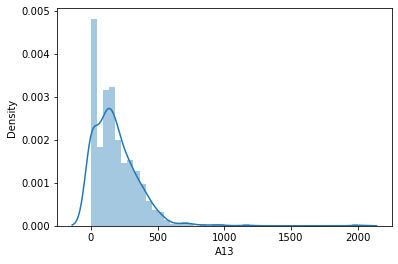

In [291]:
import warnings 
warnings.filterwarnings('ignore')

sns.distplot(df.A13)

In [292]:
df.A13.fillna(df.A13.median(),inplace=True)

In [293]:
df.isnull().sum().sum()

0

In [294]:
df.isna().sum()

A1      0
A2      0
A3      0
A4      0
A5      0
A6      0
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     0
A15     0
A0_b    0
dtype: int64

In [295]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A0_b
0,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1,1
1,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1,0
2,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1,0
3,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1,1
4,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0,1
686,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0,0
687,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0,0
688,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0,1


In [296]:
col=['A3','A4','A8','A9','A11','A12']

In [297]:
df=pd.get_dummies(df,columns=col,drop_first=True)

In [298]:
df.head()

,A1,A2,A5,A6,A7,A10,A13,A14,A15,A0_b,A3_u,A3_y,A4_gg,A4_p,A8_t,A9_t,A11_t,A12_p,A12_s
0,30.83,0.000,w,v,1.25,1,202.0,0,1,1,1,0,0,0,1,1,0,0,0
1,58.67,4.460,q,h,3.04,6,43.0,560,1,0,1,0,0,0,1,1,0,0,0
2,24.50,0.500,q,h,1.50,0,280.0,824,1,0,1,0,0,0,1,0,0,0,0
3,27.83,1.540,w,v,3.75,5,100.0,3,1,1,1,0,0,0,1,1,1,0,0
4,20.17,5.625,w,v,1.71,0,120.0,0,1,1,1,0,0,0,1,0,0,0,1


In [299]:
Le=LabelEncoder()
df.A5=Le.fit_transform(np.array(df.A5).reshape(-1,1))
df.A6=Le.fit_transform(np.array(df.A6).reshape(-1,1))

In [300]:
df.head()

,A1,A2,A5,A6,A7,A10,A13,A14,A15,A0_b,A3_u,A3_y,A4_gg,A4_p,A8_t,A9_t,A11_t,A12_p,A12_s
0,30.83,0.000,12,7,1.25,1,202.0,0,1,1,1,0,0,0,1,1,0,0,0
1,58.67,4.460,10,3,3.04,6,43.0,560,1,0,1,0,0,0,1,1,0,0,0
2,24.50,0.500,10,3,1.50,0,280.0,824,1,0,1,0,0,0,1,0,0,0,0
3,27.83,1.540,12,7,3.75,5,100.0,3,1,1,1,0,0,0,1,1,1,0,0
4,20.17,5.625,12,7,1.71,0,120.0,0,1,1,1,0,0,0,1,0,0,0,1


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    float64
 2   A5      690 non-null    int32  
 3   A6      690 non-null    int32  
 4   A7      690 non-null    float64
 5   A10     690 non-null    int64  
 6   A13     690 non-null    float64
 7   A14     690 non-null    int64  
 8   A15     690 non-null    int64  
 9   A0_b    690 non-null    uint8  
 10  A3_u    690 non-null    uint8  
 11  A3_y    690 non-null    uint8  
 12  A4_gg   690 non-null    uint8  
 13  A4_p    690 non-null    uint8  
 14  A8_t    690 non-null    uint8  
 15  A9_t    690 non-null    uint8  
 16  A11_t   690 non-null    uint8  
 17  A12_p   690 non-null    uint8  
 18  A12_s   690 non-null    uint8  
dtypes: float64(4), int32(2), int64(3), uint8(10)
memory usage: 50.0 KB


<AxesSubplot:>

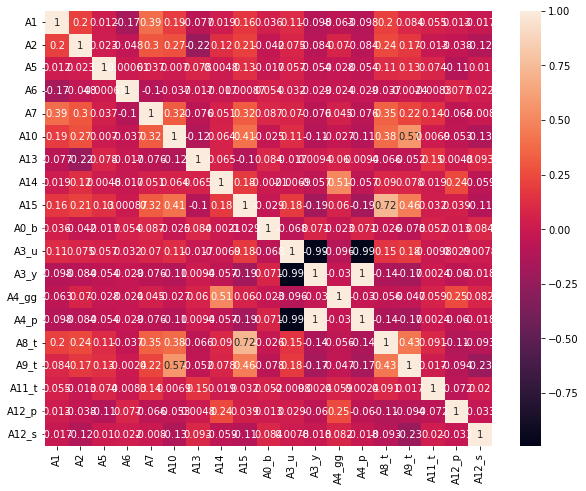

In [302]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [303]:
df.drop('A3_u',axis=1,inplace=True)

In [304]:
x=df.drop('A15',axis=1)
y=df.A15

In [305]:
df.A15.value_counts()

0    383
1    307
Name: A15, dtype: int64

In [306]:
min_max=MinMaxScaler(feature_range=(0,5))
for col in x.iloc[:,:8].columns:
    df[col]=min_max.fit_transform(np.array(df[col]).reshape(-1,1))

In [307]:
df.head()

,A1,A2,A5,A6,A7,A10,A13,A14,A15,A0_b,A3_y,A4_gg,A4_p,A8_t,A9_t,A11_t,A12_p,A12_s
0,1.284211,0.000000,4.615385,4.375,0.219298,0.074627,0.5050,0.00000,1,1,0,0,0,1,1,0,0,0
1,3.377444,0.796429,3.846154,1.875,0.533333,0.447761,0.1075,0.02800,1,0,0,0,0,1,1,0,0,0
2,0.808271,0.089286,3.846154,1.875,0.263158,0.000000,0.7000,0.04120,1,0,0,0,0,1,0,0,0,0
3,1.058647,0.275000,4.615385,4.375,0.657895,0.373134,0.2500,0.00015,1,1,0,0,0,1,1,1,0,0
4,0.482707,1.004464,4.615385,4.375,0.300000,0.000000,0.3000,0.00000,1,1,0,0,0,1,0,0,0,1


In [308]:
Log_reg=LogisticRegression()

In [309]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [310]:
cross_val_score(Log_reg,x,y,cv=5,scoring='accuracy',n_jobs=1)

array([0.64492754, 0.92753623, 0.9057971 , 0.78985507, 0.86956522])

In [311]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [312]:
Log_reg.fit(x_train,y_train)

LogisticRegression()

In [313]:
accuracy_score(y_test, Log_reg.predict(x_test))

0.8188405797101449

In [314]:
confusion_matrix(y_test , Log_reg.predict(x_test))

array([[60, 17],
       [ 8, 53]], dtype=int64)

In [318]:
precision_score(y_test,Log_reg.predict(x_test))

0.7571428571428571

In [319]:
recall_score(y_test , Log_reg.predict(x_test))

0.8688524590163934

In [317]:
Log_reg.predict(x_test)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1], dtype=int64)

In [320]:
pred=np.where (Log_reg.predict_proba(x_test) < 0.3 , 1, 0)

In [321]:
model_pred=Log_reg.predict_proba(x_test) 
model_pred 

array([[1.02747610e-02, 9.89725239e-01],
       [8.48098952e-01, 1.51901048e-01],
       [2.72607870e-01, 7.27392130e-01],
       [1.80434953e-01, 8.19565047e-01],
       [4.03036674e-01, 5.96963326e-01],
       [4.98933212e-04, 9.99501067e-01],
       [9.02262305e-01, 9.77376950e-02],
       [8.54243580e-01, 1.45756420e-01],
       [4.46599173e-02, 9.55340083e-01],
       [9.88521774e-03, 9.90114782e-01],
       [9.19957675e-01, 8.00423248e-02],
       [5.16418675e-02, 9.48358133e-01],
       [1.40943864e-01, 8.59056136e-01],
       [4.89870979e-02, 9.51012902e-01],
       [8.48571548e-01, 1.51428452e-01],
       [4.56805681e-01, 5.43194319e-01],
       [7.52650317e-02, 9.24734968e-01],
       [2.68115409e-02, 9.73188459e-01],
       [9.44565763e-02, 9.05543424e-01],
       [2.07748625e-02, 9.79225138e-01],
       [8.61710084e-01, 1.38289916e-01],
       [9.21662323e-01, 7.83376769e-02],
       [8.30636752e-01, 1.69363248e-01],
       [8.43162261e-01, 1.56837739e-01],
       [2.363098

In [322]:
print(classification_report(y_test , Log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        77
           1       0.76      0.87      0.81        61

    accuracy                           0.82       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.83      0.82      0.82       138



In [324]:
confusion_matrix(y_test,Log_reg.predict(x_test))

array([[60, 17],
       [ 8, 53]], dtype=int64)